Random Forest

In [2]:
# Disadvantages of Decision Tree

# 1. Overfitting
# 2. Underfitting

In [3]:
# Bagging

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import sklearn

In [7]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [8]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [9]:
df= pd.DataFrame(data = dataset.data, columns=dataset.feature_names)

In [10]:
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
119,17.95,20.01,114.20,982.0,0.08402,0.06722,0.07293,0.05596,0.2129,0.05025,0.5506,1.2140,3.357,54.04,0.004024,0.008422,0.02291,0.009863,0.05014,0.001902,20.58,27.83,129.20,1261.0,0.10720,0.1202,0.22490,0.11850,0.4882,0.06111
247,12.89,14.11,84.95,512.2,0.08760,0.13460,0.13740,0.03980,0.1596,0.06409,0.2025,0.4402,2.393,16.35,0.005501,0.055920,0.08158,0.013700,0.01266,0.007555,14.39,17.70,105.00,639.1,0.12540,0.5849,0.77270,0.15610,0.2639,0.11780
305,11.60,24.49,74.23,417.2,0.07474,0.05688,0.01974,0.01313,0.1935,0.05878,0.2512,1.7860,1.961,18.21,0.006122,0.023370,0.01596,0.006998,0.03194,0.002211,12.44,31.62,81.39,476.5,0.09545,0.1361,0.07239,0.04815,0.3244,0.06745
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,1.0000,0.6336,6.971,119.30,0.009406,0.030550,0.04344,0.027940,0.03156,0.003362,22.03,17.81,146.60,1495.0,0.11240,0.2016,0.22640,0.17770,0.2443,0.06251
162,19.59,18.15,130.70,1214.0,0.11200,0.16660,0.25080,0.12860,0.2027,0.06082,0.7364,1.0480,4.792,97.07,0.004057,0.022770,0.04029,0.013030,0.01686,0.003318,26.73,26.39,174.90,2232.0,0.14380,0.3846,0.68100,0.22470,0.3643,0.09223


In [13]:
df["target"] = dataset.target

In [14]:
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
499,20.59,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.11210,0.1848,0.06222,0.5904,1.2160,4.206,75.09,0.006666,0.02791,0.04062,0.014790,0.01117,0.003727,23.86,30.76,163.20,1760.0,0.1464,0.3597,0.5179,0.21130,0.2480,0.08999,0
384,13.28,13.72,85.79,541.8,0.08363,0.08575,0.05077,0.02864,0.1617,0.05594,0.1833,0.5308,1.592,15.26,0.004271,0.02073,0.02828,0.008468,0.01461,0.002613,14.24,17.37,96.59,623.7,0.1166,0.2685,0.2866,0.09173,0.2736,0.07320,1
184,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,0.2054,0.4956,1.344,19.53,0.003290,0.01395,0.01774,0.006009,0.01172,0.002575,17.80,28.03,113.80,973.1,0.1301,0.3299,0.3630,0.12260,0.3175,0.09772,0
160,11.75,20.18,76.10,419.8,0.10890,0.11410,0.06843,0.03738,0.1993,0.06453,0.5018,1.6930,3.926,38.34,0.009433,0.02405,0.04167,0.011520,0.03397,0.005061,13.32,26.21,88.91,543.9,0.1358,0.1892,0.1956,0.07909,0.3168,0.07987,1
14,13.73,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,0.07682,0.2121,1.1690,2.061,19.21,0.006429,0.05936,0.05501,0.016280,0.01961,0.008093,15.03,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.22080,0.3596,0.14310,0


In [15]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [16]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [17]:
df.columns = [col.replace(" ", "_") for col in df.columns]

In [18]:
df.sample(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
518,12.88,18.22,84.45,493.1,0.12180,0.16610,0.04825,0.05303,0.1709,0.07253,0.4426,1.1690,3.176,34.37,0.005273,0.02329,0.01405,0.012440,0.01816,0.003299,15.05,24.37,99.31,674.7,0.1456,0.2961,0.1246,0.10960,0.2582,0.08893,1
120,11.41,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.02623,0.1667,0.06113,0.1408,0.4607,1.103,10.50,0.006040,0.01529,0.01514,0.006460,0.01344,0.002206,12.82,15.97,83.74,510.5,0.1548,0.2390,0.2102,0.08958,0.3016,0.08523,1
365,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,0.1618,0.05557,0.5781,0.9168,4.218,72.44,0.006208,0.01906,0.02375,0.014610,0.01445,0.001906,24.31,26.37,161.20,1780.0,0.1327,0.2376,0.2702,0.17650,0.2609,0.06735,0
497,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,0.1532,0.7810,1.253,11.91,0.003796,0.01371,0.01346,0.007096,0.01536,0.001541,14.06,24.34,92.82,607.3,0.1276,0.2506,0.2028,0.10530,0.3035,0.07661,1
344,11.71,15.45,75.03,420.3,0.11500,0.07281,0.04006,0.03250,0.2009,0.06506,0.3446,0.7395,2.355,24.53,0.009536,0.01097,0.01651,0.011210,0.01953,0.003100,13.06,18.16,84.16,516.4,0.1460,0.1115,0.1087,0.07864,0.2765,0.07806,1


In [19]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier()

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df.target, test_size=0.15)

In [25]:
x_train.shape, y_train.shape

((483, 30), (483,))

In [32]:
x_test.shape, y_test.shape

((86, 30), (86,))

In [42]:
rfc = RandomForestClassifier()

In [43]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
rfc.feature_importances_

array([0.0571009 , 0.01521584, 0.04238209, 0.04375805, 0.00617746,
       0.01352795, 0.06419162, 0.10361855, 0.00243344, 0.0030944 ,
       0.01441501, 0.00263272, 0.01220561, 0.03652109, 0.00373988,
       0.00376936, 0.008596  , 0.00416342, 0.00288187, 0.00577963,
       0.11090751, 0.0191033 , 0.14882585, 0.07764589, 0.01245935,
       0.02156196, 0.02124135, 0.12601062, 0.00967314, 0.00636615])

In [45]:
pd.DataFrame(rfc.feature_importances_, index= x_train.columns, columns=["feature_imp"])

,feature_imp
mean_radius,0.057101
mean_texture,0.015216
mean_perimeter,0.042382
mean_area,0.043758
mean_smoothness,0.006177
mean_compactness,0.013528
mean_concavity,0.064192
mean_concave_points,0.103619
mean_symmetry,0.002433
mean_fractal_dimension,0.003094


In [47]:
rfc.n_estimators

100

In [50]:
len(rfc.estimators_)

100

In [52]:
rfc.estimators_  # All the configuration of decision trees in the random forest

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=588718430, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=826618860, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, ma

In [54]:
tree7= rfc.estimators_[7]

In [55]:
from sklearn.tree import plot_tree

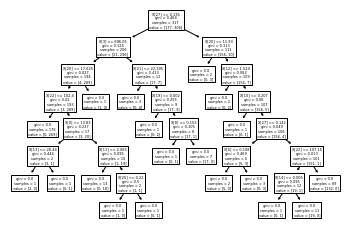

In [60]:

plot_tree(tree7)
plt.show()